In [31]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

# WineQT.csv - 이진분류

In [106]:
wine = pd.read_csv('WineQT.csv')
wine.drop(["Id"],axis=1,inplace=True)

In [107]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins,  labels = group_names)
 
# bad = 0, good = 1
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [108]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int32

In [109]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [111]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']
 
## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [112]:
## 측정 지표의 표준화. 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [113]:
## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       201
           1       0.67      0.36      0.47        28

    accuracy                           0.90       229
   macro avg       0.79      0.67      0.70       229
weighted avg       0.89      0.90      0.89       229

Accuracy: 0.8995633187772926
Precision: 0.6666666666666666
Recall: 0.35714285714285715


In [114]:
rfc.feature_importances_

array([0.06835411, 0.12458617, 0.09261179, 0.06200985, 0.07123432,
       0.05986393, 0.07605001, 0.09956097, 0.06402183, 0.12732464,
       0.15438237])

In [115]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rfc.feature_importances_})

In [116]:
df

,feature,importance
0,fixed acidity,0.068354
1,volatile acidity,0.124586
2,citric acid,0.092612
3,residual sugar,0.062010
4,chlorides,0.071234
5,free sulfur dioxide,0.059864
6,total sulfur dioxide,0.076050
7,density,0.099561
8,pH,0.064022
9,sulphates,0.127325


<BarContainer object of 11 artists>

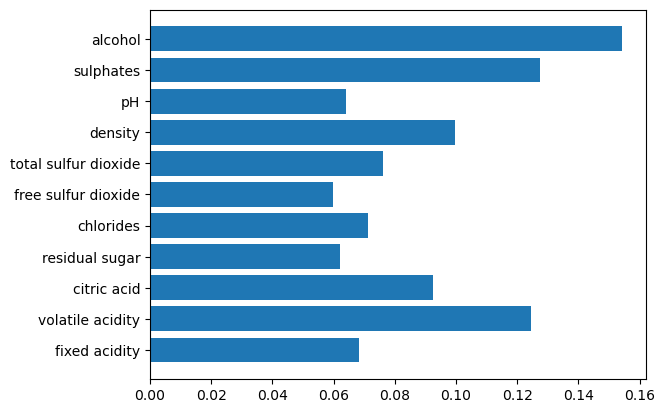

In [117]:
x = df.feature
y = df.importance


plt.barh(x, y)

# WineQT_add.csv - 이진분류

In [57]:
wine = pd.read_csv('WineQT_add.csv')

In [58]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins,  labels = group_names)
 
# bad = 0, good = 1 
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [59]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
2737    0
2738    0
2739    0
2740    0
2741    0
Name: quality, Length: 2742, dtype: int32

In [60]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [64]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']
 
## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [65]:
## 측정 지표의 표준화. 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [66]:
## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
print("Precision:", metrics.precision_score(y_test, pred_rfc))
print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       485
           1       0.89      0.78      0.83        64

    accuracy                           0.96       549
   macro avg       0.93      0.88      0.91       549
weighted avg       0.96      0.96      0.96       549

Accuracy: 0.9635701275045537
Precision: 0.8928571428571429
Recall: 0.78125


In [67]:
rfc.feature_importances_

array([0.07046124, 0.11888529, 0.08451302, 0.06712124, 0.07253458,
       0.05752321, 0.07528045, 0.10109974, 0.06442631, 0.11670794,
       0.17144697])

In [69]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rfc.feature_importances_})

In [70]:
df

,feature,importance
0,fixed acidity,0.070461
1,volatile acidity,0.118885
2,citric acid,0.084513
3,residual sugar,0.067121
4,chlorides,0.072535
5,free sulfur dioxide,0.057523
6,total sulfur dioxide,0.075280
7,density,0.101100
8,pH,0.064426
9,sulphates,0.116708


<BarContainer object of 11 artists>

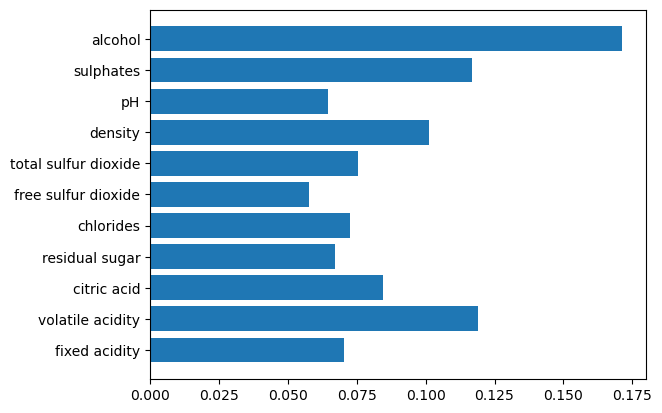

In [71]:
x = df.feature
y = df.importance


plt.barh(x, y)

# WineQT.csv - 다중분류

In [135]:
wine = pd.read_csv('WineQT.csv')
wine.drop(["Id"],axis=1,inplace=True)

In [136]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
##종속변수와 독립변수를 나누어주는 작업
x = wine.drop('quality', axis = 1)
y = wine['quality']
 
## 변수별로 Train과 Test 쓸 데이터 셋을 분류x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [138]:
## 측정 지표의 표준화. 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [139]:
## 모델의 선언
rfc = RandomForestClassifier(n_estimators=200)
 
## 학습데이터의 모델 적용
rfc.fit(x_train, y_train)
 
## 모델의 예측값 산출
pred_rfc = rfc.predict(x_test)
 
## 다양한 모델 평가 
print(classification_report(y_test, pred_rfc))
 
## 가장 기초적인 성적 평가 지표들
print("Accuracy:", metrics.accuracy_score(y_test, pred_rfc))
#print("Precision:", metrics.precision_score(y_test, pred_rfc))
#print("Recall:", metrics.recall_score(y_test, pred_rfc))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.81      0.77        96
           6       0.65      0.67      0.66        99
           7       0.60      0.46      0.52        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.40      0.39      0.39       229
weighted avg       0.65      0.68      0.67       229

Accuracy: 0.6812227074235808


C:\Users\Daeun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daeun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daeun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
rfc.feature_importances_

array([0.07245351, 0.1080944 , 0.07673347, 0.06897108, 0.08200523,
       0.06568168, 0.10053853, 0.08687592, 0.07424969, 0.12203602,
       0.14236046])

In [141]:
df = pd.DataFrame({'feature': wine.columns[:11],'importance':rfc.feature_importances_})

In [142]:
df

,feature,importance
0,fixed acidity,0.072454
1,volatile acidity,0.108094
2,citric acid,0.076733
3,residual sugar,0.068971
4,chlorides,0.082005
5,free sulfur dioxide,0.065682
6,total sulfur dioxide,0.100539
7,density,0.086876
8,pH,0.074250
9,sulphates,0.122036


<BarContainer object of 11 artists>

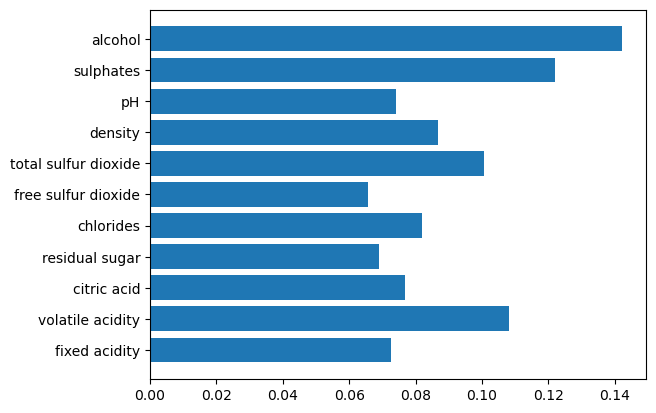

In [143]:
x = df.feature
y = df.importance


plt.barh(x, y)